In [1]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 5.1MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=3769af112f1b42b5e644f50c17957a86abd253c1183095e210d670b6dc7e509d
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d virenkathiriya/politifact
import zipfile
with zipfile.ZipFile('./politifact.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

Saving kaggle.json to kaggle.json
100% 4.69M/4.69M [00:00<00:00, 44.8MB/s]



In [4]:
# covidDf = pd.read_csv('COVID19FN.csv')
poli = pd.read_csv('Politifact_.csv')
df = pd.DataFrame()
df['text'] = poli['text']
df['Label'] = poli['is_fake']

     field1  ... link_credibility_score
0         0  ...                   0.09
1         1  ...                   0.05
2         2  ...                   0.03
3         3  ...                   0.07
4         4  ...                   0.09
..      ...  ...                    ...
883     960  ...                   0.07
884     961  ...                   0.10
885     962  ...                   0.07
886     963  ...                   0.01
887     964  ...                    NaN

[888 rows x 53 columns]


LDA Topic Modelling

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

!pip install pyLDAvis
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import re
import numpy as np
from pprint import pprint

     |████████████████████████████████| 1.6MB 4.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a33cde928e980d6f7c807253555105bec81f72a3fef4f1d817292376dc8ce9e3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
df['text']

0       circulating on social networks video that show...
1       internet sensation and the world cutest baby a...
2       a video has been viewed hundreds of thousands ...
3       a facebook post claiming that the national tre...
4       moves on facebook and twitter video showing po...
                              ...                        
2816    in early an outbreak of new coronavirus in chi...
2817    organizers of operation gridlock the first sig...
2818    on may as federal leaders debated how to respo...
2819    in march message started to circulate on faceb...
2820    on feb the beaverton published an article stat...
Name: text, Length: 2821, dtype: object

In [ ]:
data=df['text'].tolist()

In [ ]:
data = [re.sub("\'", "", sent) for sent in data]

TypeError: ignored

In [ ]:
data = [re.sub('\s+', ' ', sent) for sent in data]

TypeError: ignored

In [ ]:
data

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['circulating', 'on', 'social', 'networks', 'video', 'that', 'shows', 'an', 'excerpt', 'from', 'spanish', 'television', 'show', 'supposedly', 'issued', 'december', 'in', 'which', 'it', 'appears', 'woman', 'who', 'claims', 'to', 'be', 'psychic', 'to', 'make', 'predictions', 'in', 'this', 'video', 'the', 'woman', 'describes', 'set', 'of', 'events', 'that', 'have', 'been', 'interpreted', 'as', 'detailed', 'forecast', 'of', 'covid', 'pandemic', 'that', 'has', 'hit', 'the', 'world', 'it', 'is', 'however', 'fake', 'video', 'at', 'least', 'as', 'regards', 'the', 'date', 'of', 'issue', 'the', 'video', 'has', 'been', 'being', 'disseminated', 'on', 'the', 'internet', 'with', 'date', 'and', 'not', 'tampered', 'with', 'the', 'real']]


In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['circulating', 'on', 'social_networks', 'video', 'that', 'shows', 'an', 'excerpt', 'from', 'spanish', 'television', 'show', 'supposedly', 'issued', 'december', 'in', 'which', 'it', 'appears', 'woman', 'who', 'claims', 'to', 'be', 'psychic', 'to', 'make', 'predictions', 'in', 'this', 'video', 'the', 'woman', 'describes', 'set', 'of', 'events', 'that', 'have', 'been', 'interpreted', 'as', 'detailed', 'forecast', 'of', 'covid', 'pandemic', 'that', 'has', 'hit', 'the', 'world', 'it', 'is', 'however', 'fake', 'video', 'at', 'least', 'as', 'regards', 'the', 'date', 'of', 'issue', 'the', 'video', 'has', 'been', 'being', 'disseminated', 'on', 'the', 'internet', 'with', 'date', 'and', 'not', 'tampered', 'with', 'the', 'real']


In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['circulate', 'video', 'show', 'excerpt', 'spanish', 'television', 'show', 'supposedly', 'issue', 'appear', 'woman', 'claim', 'make', 'prediction', 'video', 'woman', 'describe', 'set', 'event', 'interpret', 'detailed', 'forecast', 'hit', 'world', 'however', 'fake', 'video', 'least', 'regard', 'date', 'issue', 'video', 'disseminate', 'internet', 'date', 'tamper', 'real']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 4), (28, 2), (29, 1)]]


In [ ]:
id2word[0]

'appear'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('appear', 1),
  ('circulate', 1),
  ('claim', 1),
  ('date', 2),
  ('describe', 1),
  ('detailed', 1),
  ('disseminate', 1),
  ('event', 1),
  ('excerpt', 1),
  ('fake', 1),
  ('forecast', 1),
  ('hit', 1),
  ('however', 1),
  ('internet', 1),
  ('interpret', 1),
  ('issue', 2),
  ('least', 1),
  ('make', 1),
  ('prediction', 1),
  ('real', 1),
  ('regard', 1),
  ('set', 1),
  ('show', 2),
  ('spanish', 1),
  ('supposedly', 1),
  ('tamper', 1),
  ('television', 1),
  ('video', 4),
  ('woman', 2),
  ('world', 1)]]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.052*"claim" + 0.036*"video" + 0.033*"post" + 0.027*"share" + 0.026*"show" '
  '+ 0.021*"image" + 0.019*"publish" + 0.018*"find" + 0.017*"news" + '
  '0.016*"also"'),
 (1,
  '0.047*"chinese" + 0.016*"world" + 0.015*"country" + 0.015*"dollar" + '
  '0.014*"global" + 0.012*"student" + 0.011*"australian" + 0.009*"leave" + '
  '0.009*"represent" + 0.009*"foreign"'),
 (2,
  '0.044*"case" + 0.024*"confirm" + 0.020*"country" + 0.017*"report" + '
  '0.015*"also" + 0.015*"new" + 0.013*"official" + 0.013*"hospital" + '
  '0.012*"test" + 0.012*"number"'),
 (3,
  '0.026*"supposedly" + 0.025*"message" + 0.020*"circulate" + 0.013*"package" '
  '+ 0.012*"receive" + 0.011*"government" + 0.011*"user" + 0.010*"make" + '
  '0.010*"session" + 0.009*"charge"'),
 (4,
  '0.025*"also" + 0.022*"article" + 0.018*"topic" + 0.016*"share" + '
  '0.011*"use" + 0.011*"new" + 0.010*"start" + 0.010*"bring" + 0.010*"chain" + '
  '0.009*"temperature"'),
 (5,
  '0.022*"treatment" + 0.019*"virus" + 0.019*"cure" +

In [ ]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.052*"claim" + 0.036*"video" + 0.033*"post" + 0.027*"share"')
(1, '0.047*"chinese" + 0.016*"world" + 0.015*"country" + 0.015*"dollar"')
(2, '0.044*"case" + 0.024*"confirm" + 0.020*"country" + 0.017*"report"')
(3, '0.026*"supposedly" + 0.025*"message" + 0.020*"circulate" + 0.013*"package"')
(4, '0.025*"also" + 0.022*"article" + 0.018*"topic" + 0.016*"share"')
(5, '0.022*"treatment" + 0.019*"virus" + 0.019*"cure" + 0.018*"prevent"')
(6, '0.060*"virus" + 0.019*"cause" + 0.016*"vaccine" + 0.014*"human"')
(7, '0.030*"travel" + 0.026*"virus" + 0.015*"close" + 0.015*"country"')
(8, '0.034*"trump" + 0.024*"say" + 0.024*"government" + 0.021*"state"')
(9, '0.036*"close" + 0.029*"market" + 0.026*"stock" + 0.025*"point"')
(10, '0.042*"percent" + 0.022*"significant" + 0.017*"epidemic" + 0.013*"pandemic"')
(11, '0.041*"say" + 0.024*"people" + 0.016*"spread" + 0.016*"virus"')
(12, '0.018*"relief" + 0.016*"stimulus" + 0.015*"ease" + 0.013*"help"')
(13, '0.028*"snope" + 0.027*"article" + 0.025*"s

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.705100504495644

Coherence Score:  0.41362841002068595


In [ ]:
topic_list=lda_model.print_topics()
dict={}
ntop=15
for ind in range(0,len(topic_list)):
  print(topic_list[ind][1])
  st=[]
  s=""
  for i in range(0,len(topic_list[0][1])):
    if(topic_list[ind][1][i]=='"'):
      st.append(s)
      s=""
    else:
      if(topic_list[ind][1][i]>='a' and topic_list[ind][1][i]<='z'):
        s+=(topic_list[ind][1][i])
  print(st)
  k=[]
  k=st[1::2]
  print(k)
  dict[ind]=k


0.052*"claim" + 0.036*"video" + 0.033*"post" + 0.027*"share" + 0.026*"show" + 0.021*"image" + 0.019*"publish" + 0.018*"find" + 0.017*"news" + 0.016*"also"
['', 'claim', '', 'video', '', 'post', '', 'share', '', 'show', '', 'image', '', 'publish', '', 'find', '', 'news', '', 'also']
['claim', 'video', 'post', 'share', 'show', 'image', 'publish', 'find', 'news', 'also']
0.047*"chinese" + 0.016*"world" + 0.015*"country" + 0.015*"dollar" + 0.014*"global" + 0.012*"student" + 0.011*"australian" + 0.009*"leave" + 0.009*"represent" + 0.009*"foreign"
['', 'chinese', '', 'world', '', 'country', '', 'dollar', '', 'global', '', 'student', '', 'australian', '', 'leave', '']
['chinese', 'world', 'country', 'dollar', 'global', 'student', 'australian', 'leave']
0.044*"case" + 0.024*"confirm" + 0.020*"country" + 0.017*"report" + 0.015*"also" + 0.015*"new" + 0.013*"official" + 0.013*"hospital" + 0.012*"test" + 0.012*"number"
['', 'case', '', 'confirm', '', 'country', '', 'report', '', 'also', '', 'new',

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.278058  0.002084       1        1  22.186391
2     -0.211932  0.032412       2        1  13.677098
0     -0.041888  0.211036       3        1  13.270368
6     -0.128126  0.118998       4        1  11.008404
8     -0.122937 -0.130788       5        1   6.759918
3      0.033127  0.090669       6        1   4.930812
9      0.018602 -0.255999       7        1   4.610386
5      0.033710  0.078757       8        1   4.320731
1      0.025237 -0.049997       9        1   3.843708
7     -0.031484 -0.182863      10        1   3.699208
4      0.083551  0.087655      11        1   3.530503
10     0.143157 -0.055200      12        1   2.440348
14     0.128128 -0.021375      13        1   2.212636
13     0.192206  0.047591      14        1   1.874343
12     0.156706  0.027022      15        1   1.635147, topic_info=        Term         Freq        Total Category  logprob  loglift
734    virus  4277.000000  4277.000000  Default  30.0000  30.0000
2      claim  2856.000000  2856.000000  Default  29.0000  29.0000
27     video  1934.000000  1934.000000  Default  28.0000  28.0000
324     case  2626.000000  2626.000000  Default  27.0000  27.0000
92       say  4697.000000  4697.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
288   public    52.497097   672.648325  Topic15  -4.7194   1.5630
243     fact    43.298699   389.023799  Topic15  -4.9120   1.9179
294     seek    36.650656   193.137655  Topic15  -5.0787   2.4515
299  support    36.054743   300.724885  Topic15  -5.0951   1.9923
85      post    38.228990  1784.023867  Topic15  -5.0365   0.2704

[870 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2325      6  0.963598   accept
30        1  0.157644   accord
30        2  0.336871   accord
30        3  0.157644   accord
30        4  0.279631   accord
...     ...       ...      ...
395       9  0.124461     year
395      12  0.094130     year
6907     10  0.941733      yen
3771      8  0.975326    yield
114       3  0.986492  youtube

[1607 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 3, 1, 7, 9, 4, 10, 6, 2, 8, 5, 11, 15, 14, 13])

{0: ['deserve', 'woman', 'victim', 'photo', 'man'],
 1: ['course', 'victim', 'woman', 'photo', 'man'],
 2: ['photo', 'woman', 'victim', 'man', 'girl'],
 3: ['completely', 'woman', 'victim', 'photo', 'man'],
 4: ['man', 'woman', 'victim', 'photo', 'girl'],
 5: ['woman', 'victim', 'photo', 'man', 'girl'],
 6: ['woman', 'girl', 'victim', 'photo', 'man'],
 7: ['claim', 'woman', 'victim', 'photo', 'man'],
 8: ['completely', 'woman', 'victim', 'photo', 'man'],
 9: ['girl', 'woman', 'victim', 'photo', 'man'],
 10: ['victim', 'woman', 'photo', 'man', 'girl'],
 11: ['course', 'woman', 'victim', 'photo', 'man'],
 12: ['man', 'woman', 'victim', 'photo', 'girl'],
 13: ['photo', 'woman', 'victim', 'man', 'girl'],
 14: ['completely', 'woman', 'victim', 'photo', 'man']}

,"['deserve', 'woman', 'victim', 'photo', 'man']","['course', 'victim', 'woman', 'photo', 'man']","['photo', 'woman', 'victim', 'man', 'girl']","['completely', 'woman', 'victim', 'photo', 'man']","['man', 'woman', 'victim', 'photo', 'girl']","['woman', 'victim', 'photo', 'man', 'girl']","['woman', 'girl', 'victim', 'photo', 'man']","['claim', 'woman', 'victim', 'photo', 'man']","['completely', 'woman', 'victim', 'photo', 'man']","['girl', 'woman', 'victim', 'photo', 'man']","['victim', 'woman', 'photo', 'man', 'girl']","['course', 'woman', 'victim', 'photo', 'man']","['man', 'woman', 'victim', 'photo', 'girl']","['photo', 'woman', 'victim', 'man', 'girl']","['completely', 'woman', 'victim', 'photo', 'man']"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text Summarization

In [36]:
df = df.dropna()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time.time()

tfidf = vectorizer.fit_transform(df['text'])

In [61]:
from sklearn.decomposition import NMF
n_topics = 10
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['think', 'going', 've', 'applause', 'want'],
 1: ['trump', 'donald', 'clinton', 'white', 'obama'],
 2: ['com', 'contact', '800', 'help', 'need'],
 3: ['available', 'video', 'transcript', 'try', 'later'],
 4: ['site', 'data', 'stories', 'use', 'website'],
 5: ['watch', 'remove', '10', 'com', 'office'],
 6: ['version', 'supported', 'experience', 'using', 'best'],
 7: ['police', 'gun', 'city', 'united', 'according'],
 8: ['mccain', 'obama', 'john', '2008', 'senator'],
 9: ['health', 'care', 'insurance', 'tax', 'plan']}

In [62]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

In [63]:
t = pipe.transform(df['text']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0, n_topics)])
t.head()

,"['think', 'going', 've', 'applause', 'want']","['trump', 'donald', 'clinton', 'white', 'obama']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'city', 'united', 'according']","['mccain', 'obama', 'john', '2008', 'senator']","['health', 'care', 'insurance', 'tax', 'plan']"
0,0.019859,0.025785,0.000000,0.0,0.016508,0.000000,0.038141,0.104655,0.000000,0.010239
1,0.002714,0.012053,0.000000,0.0,0.000000,0.001404,0.000000,0.034922,0.019997,0.000705
2,0.033858,0.000000,0.000000,0.0,0.031884,0.000000,0.018924,0.054815,0.000000,0.000865
3,0.016121,0.109425,0.007534,0.0,0.059755,0.000000,0.000000,0.077483,0.002864,0.000000
4,0.000000,0.251840,0.116433,0.0,0.048660,0.000825,0.000000,0.000000,0.008121,0.000000


In [65]:
t['Label']=df['Label']
t = t.dropna()

In [66]:
import time
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)

In [67]:
columns=t.columns[:-1]
x=t[columns]
y=t['Label']
y=y.astype('int')
print(x)
print(y)

     ['think', 'going', 've', 'applause', 'want']  ...  ['health', 'care', 'insurance', 'tax', 'plan']
0                                        0.019859  ...                                        0.010239
1                                        0.002714  ...                                        0.000705
2                                        0.033858  ...                                        0.000865
3                                        0.016121  ...                                        0.000000
4                                        0.000000  ...                                        0.000000
..                                            ...  ...                                             ...
883                                      0.010577  ...                                        0.000000
884                                      0.045393  ...                                        0.148421
885                                      0.000000  ...                   

In [68]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
# models.append(lr)
# models.append(dt)
# models.append(naive)
# models.append(lda)
# models.append(clf)
# models.append(knn2)
models.append(knn3)
# models.append(knn4)

models.append(regressor)
models.append(gbc)
# models.append(bagging)
# models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') Overall accuracy: [0.78651685 0.78651685]
Execution Time: 0.027590036392211914
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Overall accuracy: [0.84644195 0.84644195]
Execution Time: 0.21291089057922363
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           lea

TypeError: ignored

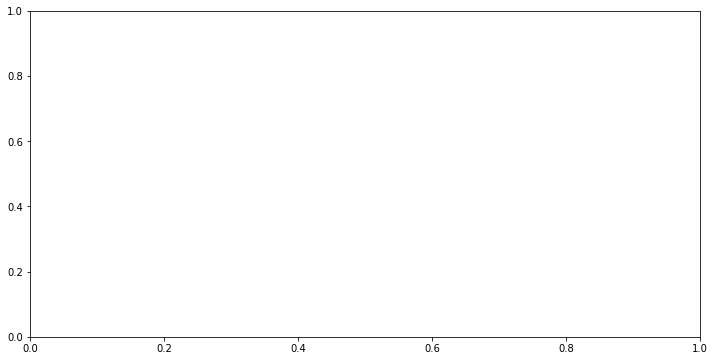

In [13]:
new_t = t.melt()


fig, ax = plt.subplots(figsize=(12,6), ncols=1, nrows=1)
sns.violinplot(x="variable", y="value", data=new_t, palette='Reds', ax=ax)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.show()

NER- Named Entity Recognition

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=42)

In [16]:
train

,text,Label
6,"Last night, a twitter account by the name of @...",True
575,"AMANPOUR: Madam Speaker, thank you so much for...",False
444,Thank you so much Charlie [Rangel]. Thanks for...,False
73,Fox News host Sandra Smith on Wednesday linked...,True
669,Home\n\nAbout Senator Gravel Biography Article...,False
...,...,...
106,Max Pixel\n\nConspiracy theorists have sparked...,True
270,Michelle Obama has been mostly laying low on o...,True
860,"Published on Mar 8, 2014\n\nIn the Weekly Repu...",False
435,Chief Justices\n\nAssociate Justices\n\nNotes:...,False


[]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  app.launch_new_instance()


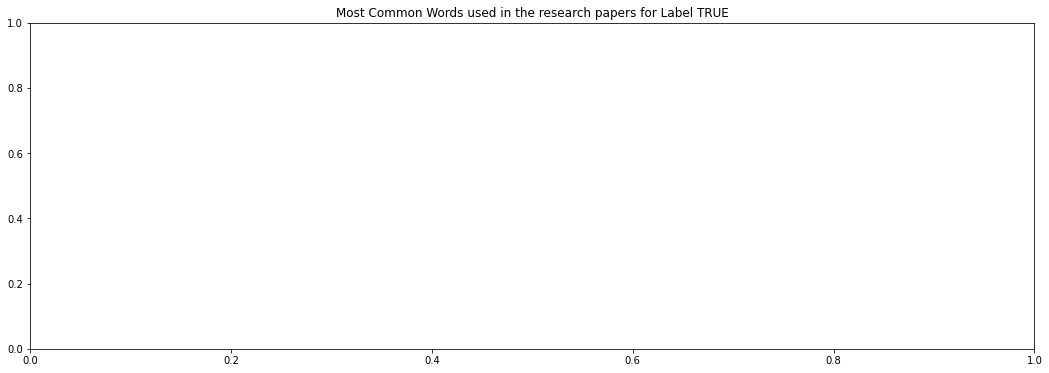

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)
INFO_text = [text for text in train[train['Label'] == 'True']['text']]
print(INFO_text)  ## Title for true data
IS_text = [text for text in train[train['Label'] == 'False']['text']]  ## ## Title for false data
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
# sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for Label TRUE')
plt.show()

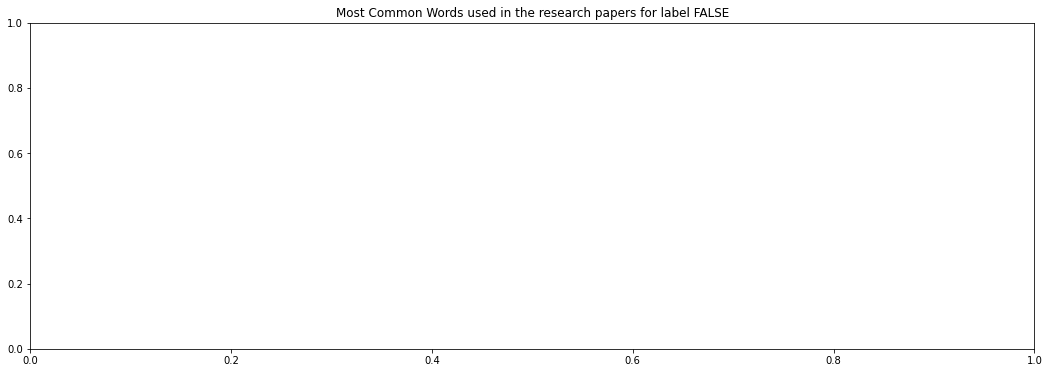

In [19]:
IS_common_words = [word[0] for word in IS_counts.most_common(20)]
IS_common_counts = [word[1] for word in IS_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
# sns.barplot(x=IS_common_words, y=IS_common_counts)
plt.title('Most Common Words used in the research papers for label FALSE')
plt.show()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import string
import re
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
def printNMostInformative(vectorizer, regressor, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(regressor.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
vectorizer = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,1))
# clf = LinearSVC()  ## accuracy: 0.8673469387755102
# gbc = GradientBoostingClassifier(random_state=0)  ## accuracy: 0.8775510204081632
regressor = RandomForestClassifier(n_estimators = 100)  ## accuracy: 0.9149659863945578
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('regressor', regressor)])
# data
train1 = train['text'].tolist()
labelsTrain1 = train['Label'].tolist()
test1 = test['text'].tolist()
labelsTest1 = test['Label'].tolist()
# train
pipe.fit(train1, labelsTrain1)
# test
preds = pipe.predict(test1)
print("accuracy:", accuracy_score(labelsTest1, preds))
print("Top 10 features used to predict: ")

# printNMostInformative(vectorizer, regressor, 10)
pipe = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer)])
transform = pipe.fit_transform(train1, labelsTrain1)
vocab = vectorizer.get_feature_names()
for i in range(len(train1)):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

accuracy: 0.9149659863945578
Top 10 features used to predict: 


In [35]:
from sklearn import metrics
print(metrics.classification_report(labelsTest1, preds, 
                                    target_names=['True', 'False']))

              precision    recall  f1-score   support

        True       0.91      0.94      0.93       171
       False       0.92      0.88      0.90       123

    accuracy                           0.91       294
   macro avg       0.92      0.91      0.91       294
weighted avg       0.91      0.91      0.91       294

